## TODO

* Formalizá un poquito, man $$ \int_{m=🍒}^{5🍌} 🙊^e dm$$


# Objetivos

> **1.** Simular valores aleatorios (*muestras*) con **distribución Uniforme** $U(0,1)$
>
>   $\downarrow$
>
>
> **2.** Obtener **a partir de ellos**, valores aleatorios con **distribución Normal** $N(0,1)$
>
>   $\downarrow$
>
>
> **3.** Obtener valores aleatorios con **distribución Normal** $N(\mu,\sigma^2)$ para cualquier $\mu, \sigma$

# Estrategia

#### Teorema:

Sean:

> $U \sim U(0,1)$
>
> $X \sim F_X$ , con $F_X$ inversible
>
> $Y = F_X^{-1}(U)$

Demo:

> $F_Y(y) = P(Y \leq y)$
>
> $= P(F_X^{-1}(U) \leq y)  $
>
> Aplico $F_X(·)$ a ambos términos
>
>*(puedo pues $F$ de acumulación es creciente)*
>
> $= P(F_X(F_X^{-1}(U)) \leq F_X(y))  $
>
> $= P(U \leq F_X(y))$
> 
> $= F_X(y)$

Con $F_x$ una distribución cualquiera.

De modo que **si tengo la inversa de una distribución acumulada** $F_X$, puedo usarla para ***"transformar" valores aleatorios Uniformes en valores aleatorios con distribución $F_X$***.

Se usará la función de distribución Gaussiana.

# Función de Acumulación

Para visualizar mejor el proceso de *mapeo*, comienzo por **construir** la función de distribución acumulada a partir de la densidad de una Normal $N(0,1)$

**Para ello:**

* Discretizo valores para representar áreas como rectángulos.
* Simil a integral de Riemann
  
  *Wiki:* [*Integral de Riemann: Interpretación geométrica*](https://es.wikipedia.org/wiki/Integraci%C3%B3n_de_Riemann#Interpretaci%C3%B3n_geom%C3%A9trica)
  
  ![Riemann_integral_regular.gif](https://upload.wikimedia.org/wikipedia/commons/2/28/Riemann_integral_regular.gif)

### Grafico valores de función Normal

In [45]:
#?dnorm # Ejecutar '?comando' para ver documentacion

In [64]:
X_data <- seq(-4, 4, 0.1)
Y_data <- dnorm(X_data, mean=0, sd=1) 
data   <- data.frame(X_data, Y_data)
head(data)

X_data,Y_data
"-4,0","0,0001338302"
"-3,9","0,0001986555"
"-3,8","0,0002919469"
"-3,7","0,0004247803"
"-3,6","0,0006119019"
"-3,5","0,0008726827"


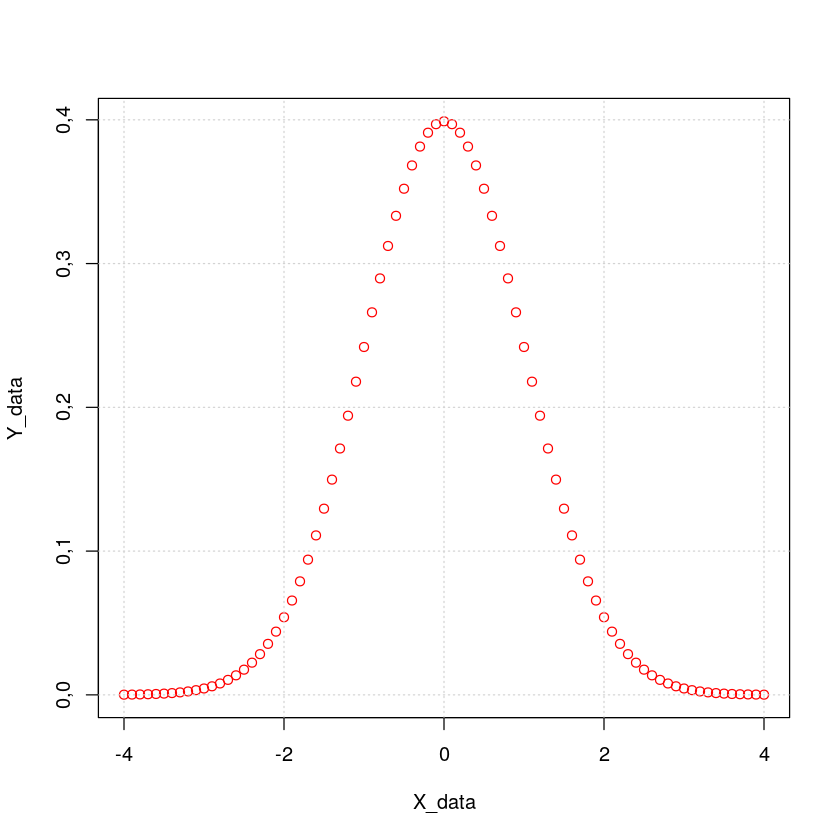

In [65]:
plot(data, col='red')
grid()

#### Zoom a una de las colas

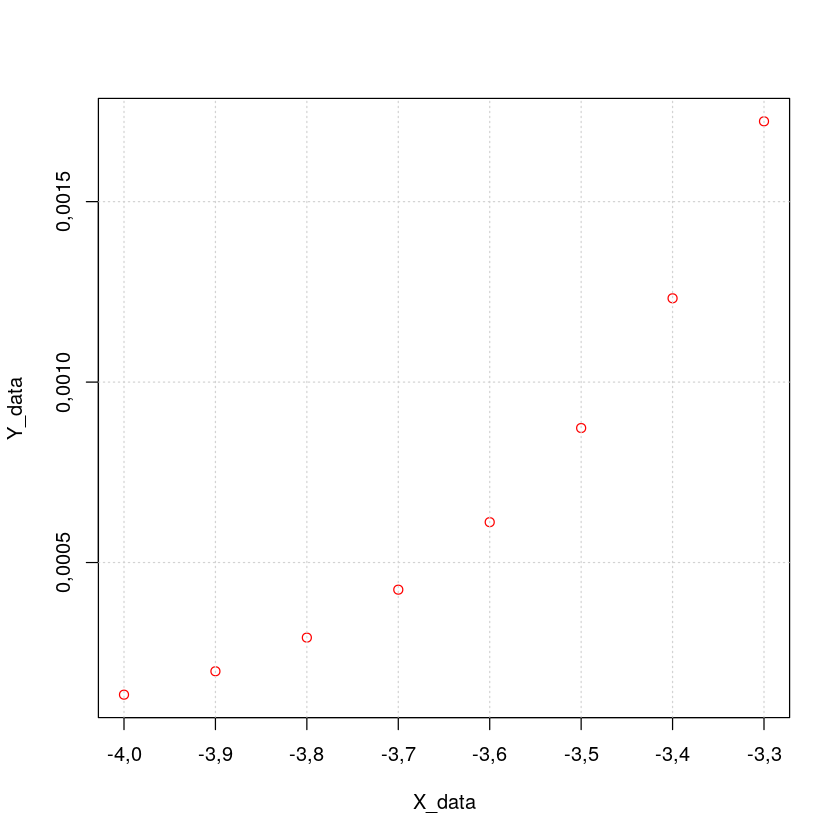

In [66]:
plot(head(data, 8), col='red')
grid()

* Necesito el área (para acumular probabilidad)
* Para cada punto dibujo un rectángulo de izquierda a derecha 

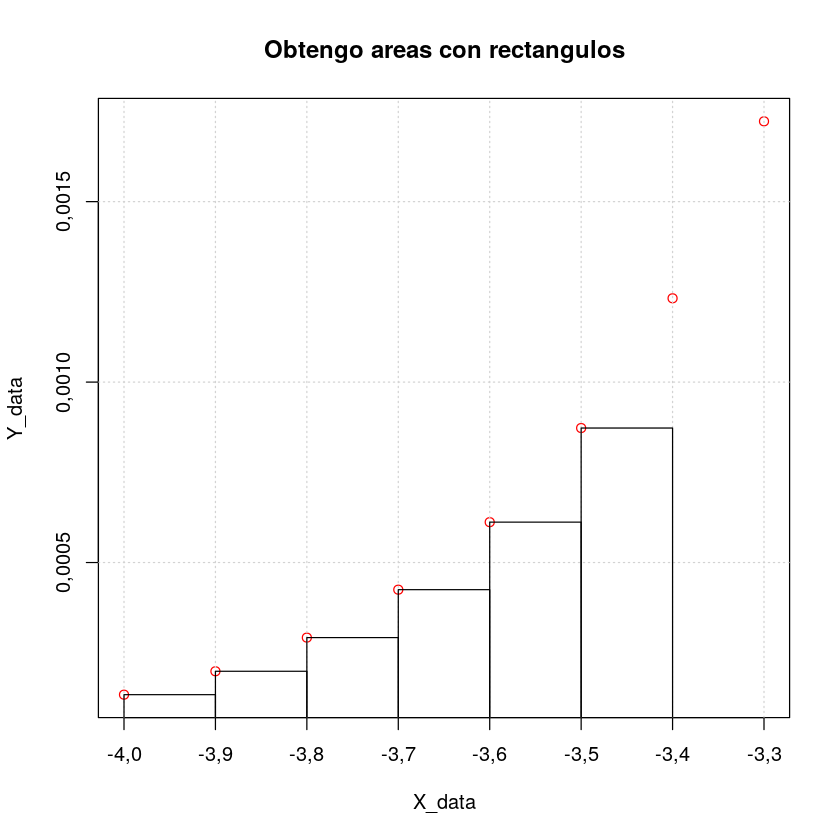

In [67]:
plot(head(data, 8), col='red')
grid()
title('Obtengo areas con rectangulos')
rect(xleft=data[1,1], ybottom=0, xright=data[2,1], ytop=data[1,2])
rect(xleft=data[2,1], ybottom=0, xright=data[3,1], ytop=data[2,2])
rect(xleft=data[3,1], ybottom=0, xright=data[4,1], ytop=data[3,2])
rect(xleft=data[4,1], ybottom=0, xright=data[5,1], ytop=data[4,2])
rect(xleft=data[5,1], ybottom=0, xright=data[6,1], ytop=data[5,2])
rect(xleft=data[6,1], ybottom=0, xright=data[7,1], ytop=data[6,2])

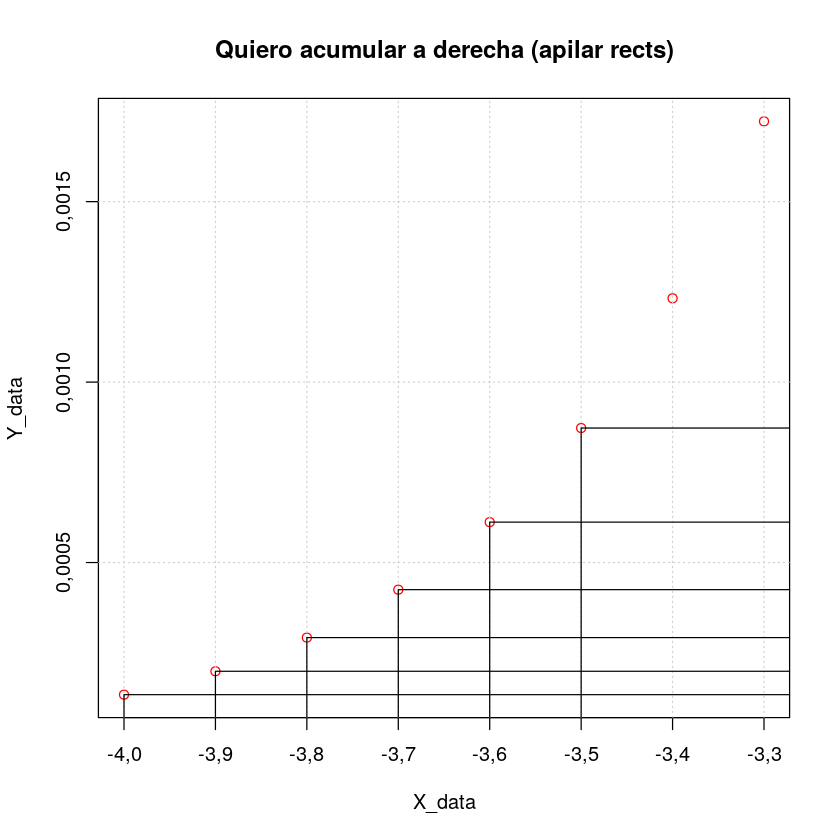

In [68]:
plot(head(data, 8), col='red')
grid()
title('Quiero acumular a derecha (apilar rects)')
rect(xleft=data[1,1], ybottom=0, xright=4, ytop=data[1,2])
rect(xleft=data[2,1], ybottom=0, xright=4, ytop=data[2,2])
rect(xleft=data[3,1], ybottom=0, xright=4, ytop=data[3,2])
rect(xleft=data[4,1], ybottom=0, xright=4, ytop=data[4,2])
rect(xleft=data[5,1], ybottom=0, xright=4, ytop=data[5,2])
rect(xleft=data[6,1], ybottom=0, xright=4, ytop=data[6,2])

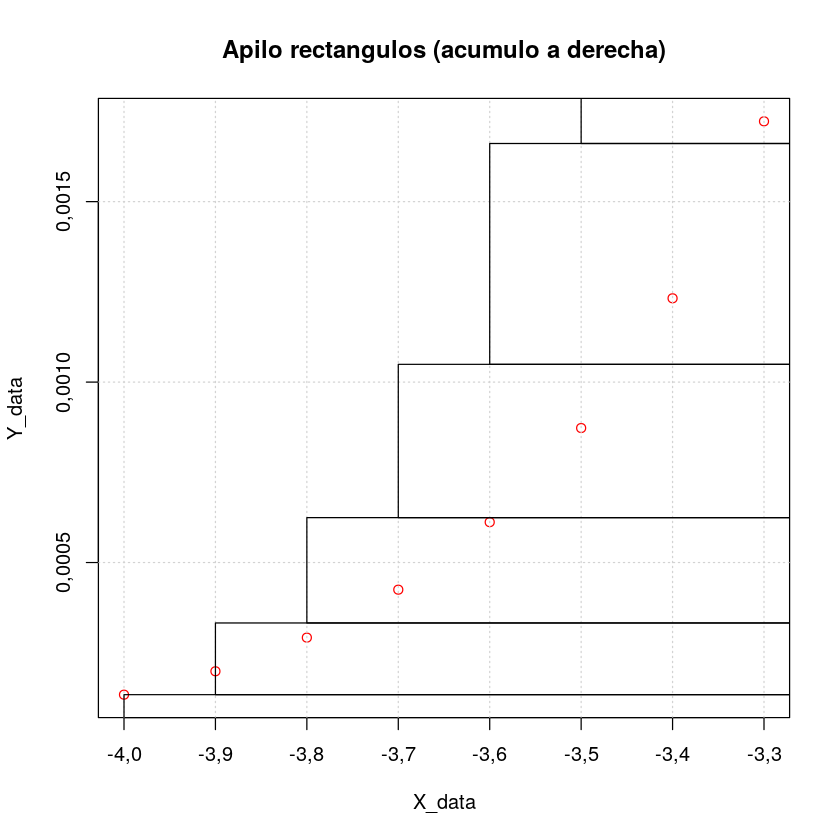

In [69]:
plot(head(data, 8), col='red')
grid()
title('Apilo rectangulos (acumulo a derecha)')
rect(xleft=data[1,1], ybottom=0, xright=4, ytop=data[1,2])
rect(xleft=data[2,1], ybottom=sum(data[1,2]), xright=4, ytop=sum(data[1:2,2]))
rect(xleft=data[3,1], ybottom=sum(data[1:2,2]), xright=4, ytop=sum(data[1:3,2]))
rect(xleft=data[4,1], ybottom=sum(data[1:3,2]), xright=4, ytop=sum(data[1:4,2]))
rect(xleft=data[5,1], ybottom=sum(data[1:4,2]), xright=4, ytop=sum(data[1:5,2]))
rect(xleft=data[6,1], ybottom=sum(data[1:5,2]), xright=4, ytop=sum(data[1:6,2]))

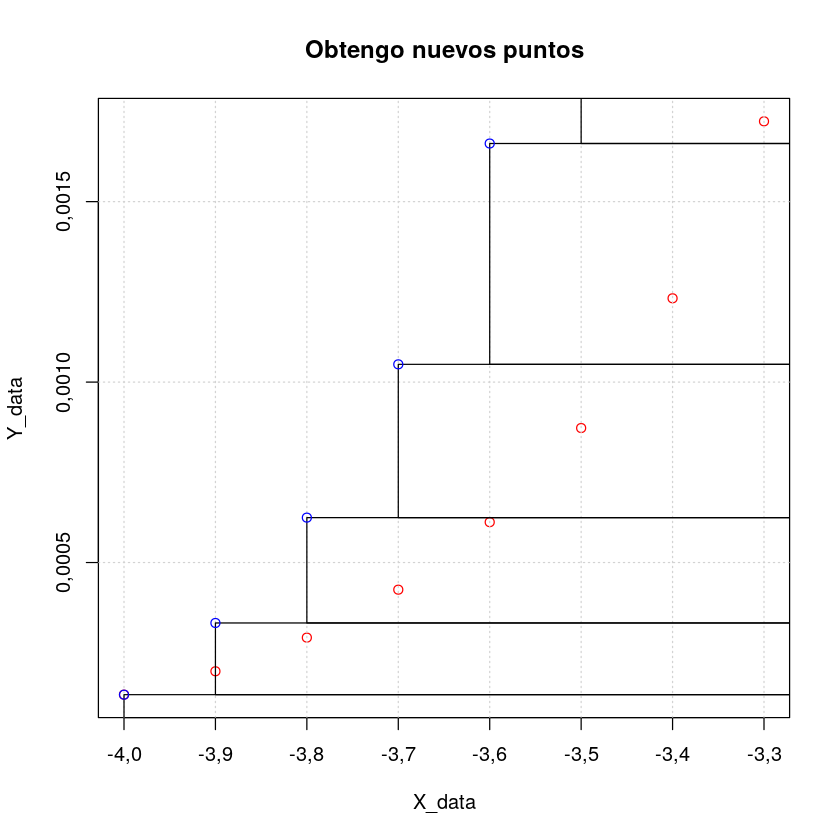

In [70]:
plot(head(data, 8), col='red')
grid()
title('Obtengo nuevos puntos')
rect(xleft=data[1,1], ybottom=0, xright=4, ytop=data[1,2])
p_i <- c(data[1,1], sum(data[1:1,2]))
points(p_i[1], p_i[2], col='blue')

rect(xleft=data[2,1], ybottom=sum(data[1,2]), xright=4, ytop=sum(data[1:2,2]))
p_i <- c(data[2,1], sum(data[1:2,2]))
points(p_i[1], p_i[2], col='blue')

rect(xleft=data[3,1], ybottom=sum(data[1:2,2]), xright=4, ytop=sum(data[1:3,2]))
p_i <- c(data[3,1], sum(data[1:3,2]))
points(p_i[1], p_i[2], col='blue')

rect(xleft=data[4,1], ybottom=sum(data[1:3,2]), xright=4, ytop=sum(data[1:4,2]))
p_i <- c(data[4,1], sum(data[1:4,2]))
points(p_i[1], p_i[2], col='blue')

rect(xleft=data[5,1], ybottom=sum(data[1:4,2]), xright=4, ytop=sum(data[1:5,2]))
p_i <- c(data[5,1], sum(data[1:5,2]))
points(p_i[1], p_i[2], col='blue')

rect(xleft=data[6,1], ybottom=sum(data[1:5,2]), xright=4, ytop=sum(data[1:6,2]))
p_i <- c(data[6,1], sum(data[1:6,2]))
points(p_i[1], p_i[2], col='blue')

### Función de acumulación

**Notar:** Valores máximos de la función

In [71]:
acum_data <- data
for(i in c(2:nrow(acum_data))){
    acum_data[i,2] = acum_data[i,2] + acum_data[i-1,2]
}

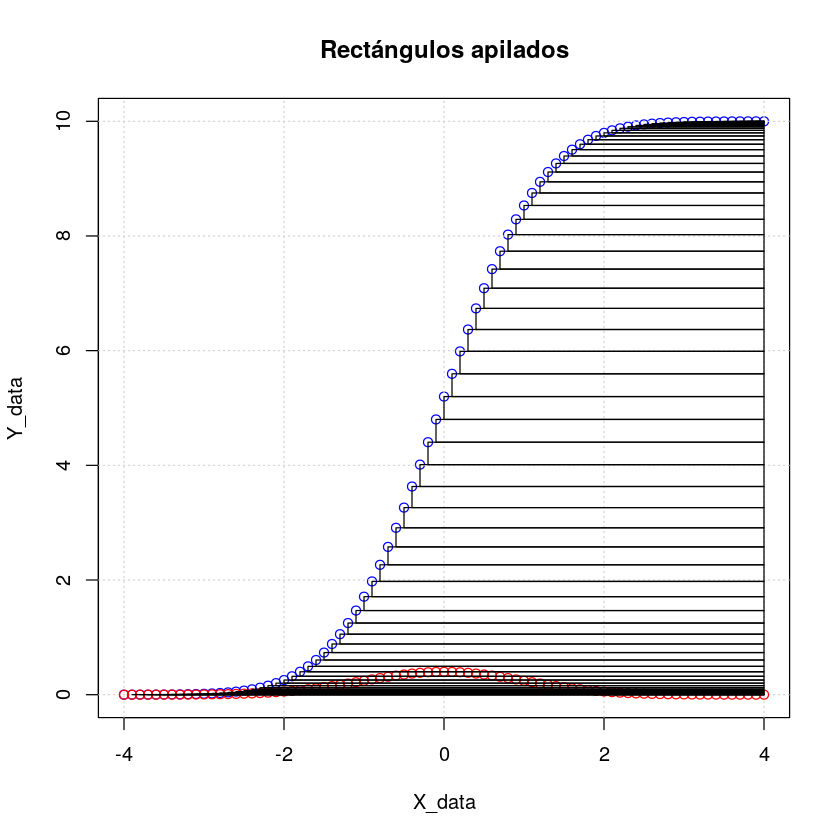

In [72]:
plot(acum_data, col='blue')
grid()
points(data, col='red')
title('Rectángulos apilados')

for(i in c(2:nrow(acum_data))){
    rect(xleft=data[i,1], ybottom=acum_data[i-1,2], xright=4, ytop=acum_data[i,2])
}

### Normalizo (divido por 8 la acumulada) y comparo con generada por R (verde)

#### Obs:

Al haber usado un step size de 0.1 (1/10) al elegir los puntos en el eje X, necesito dividir por 10 para contemplar el error de área acumulado.

De haber usado step size 0.25 (1/4), tendría que haber dividido por 4.

#### Duda:
* Por qué la densidad queda POR ENCIMA de la de acumulación entre -2 y -1 ?
* Que significa que el **área de la función Normal sea menor al valor de la función** en esos puntos ?

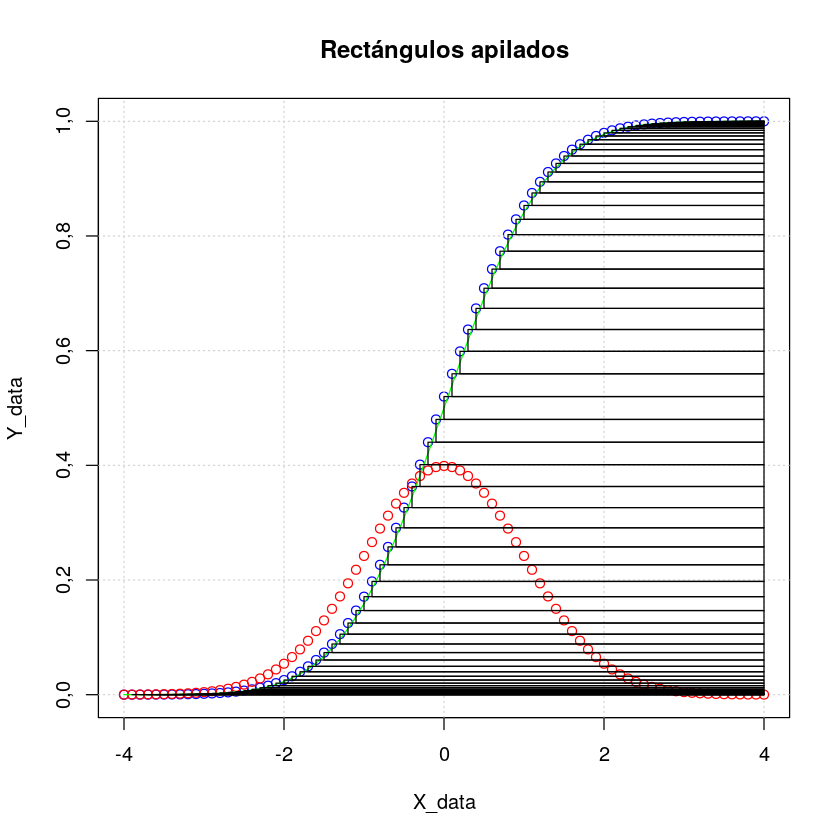

In [74]:
norm_acum_data = acum_data
for(i in c(1:nrow(acum_data))){
    norm_acum_data[i,2] = acum_data[i,2]/10
}

plot(norm_acum_data, col='blue')
grid()
points(data, col='red')
lines(seq(-4,4,0.125),pnorm(seq(-4,4,0.125)),col='green')
title('Rectángulos apilados')

for(i in c(2:nrow(norm_acum_data))){
    rect(xleft=data[i,1], ybottom=norm_acum_data[i-1,2], xright=4, ytop=norm_acum_data[i,2])
}

**Notar** que entre -2 y 2 del eje X ocurre **casi todo el crecimiento en Y** de la función de acumulación.

**Observar** cómo se corresponde con **el área** de la función de densidad (en rojo), donde la mayor parte del área se concentra en el centro.

## El plan: 

A partir de valores **uniformemente aleatorios** entre 0 y 1 obtener valores aleatorios **con distribución Normal**

**Necesito:**

* Inversa de función de acumulación 
* * Puedo obtenerla a partir de lo anterior

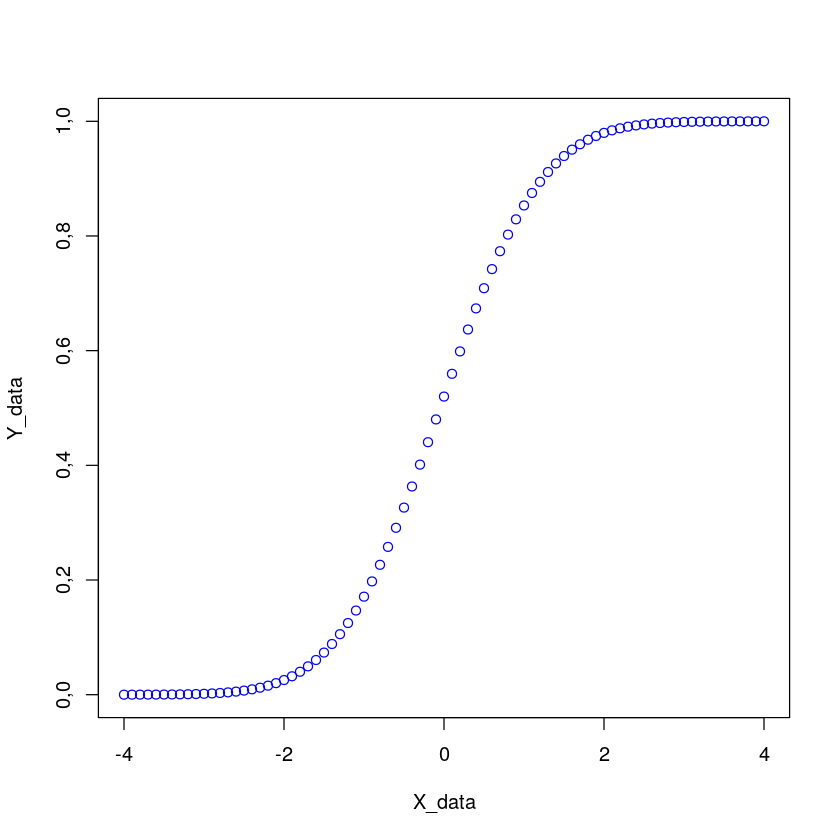

In [75]:
plot(norm_acum_data, col='blue')

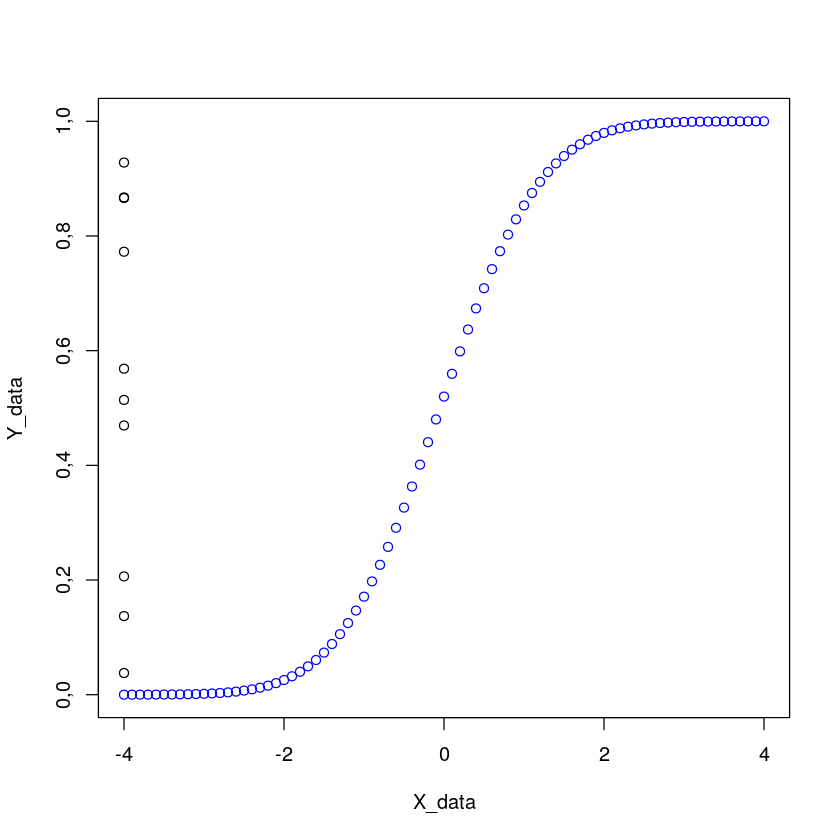

In [76]:
plot(norm_acum_data, col='blue')
points(rep(-4,10), runif(10))

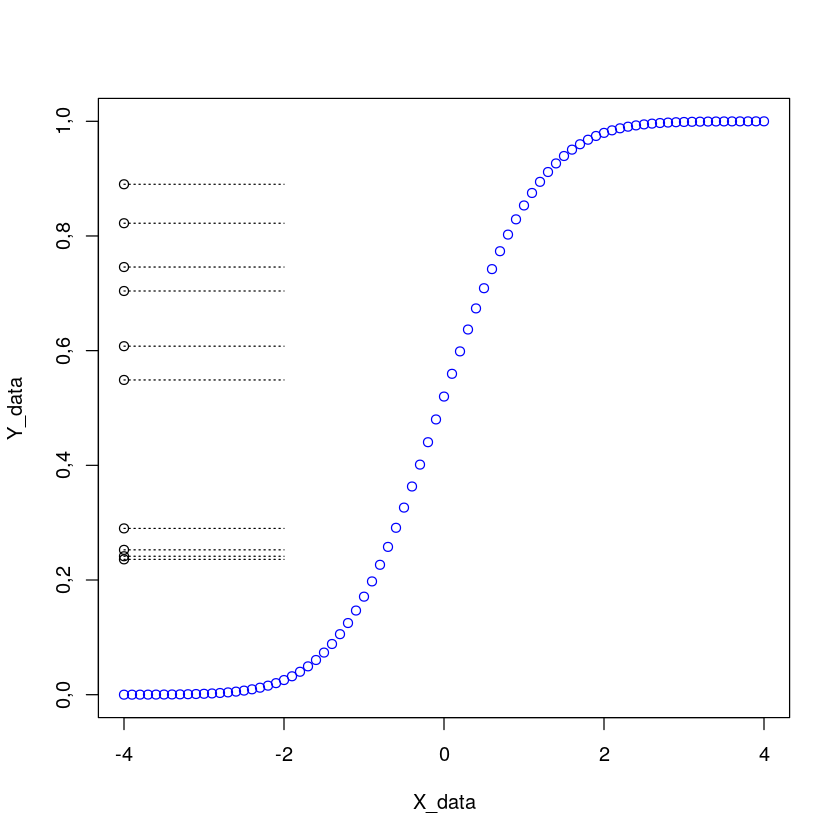

In [84]:
plot(norm_acum_data, col='blue')
random_points <- runif(10)
points(rep(-4,10), random_points)
segments(x0=rep(-4,10), y0=random_points,
         x1=-2, y1=random_points, lty=3)

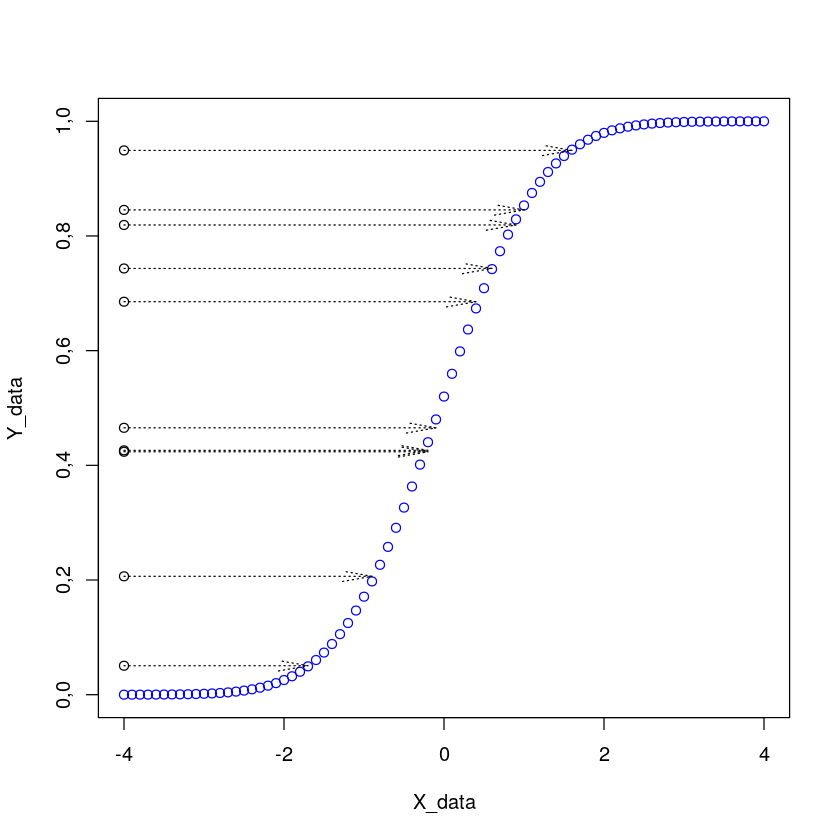

In [79]:
plot(norm_acum_data, col='blue')
random_points <- runif(10)
points(rep(-4,10), random_points)

for(i in c(1:10)){
    idx <- which.min(abs(random_points[i]-norm_acum_data[,2]))
    nearest <- norm_acum_data[idx,1]
    arrows(x0=-4, y0=random_points[i],
           x1=nearest,
           y1=random_points[i],
           angle=10, lty=3)
}


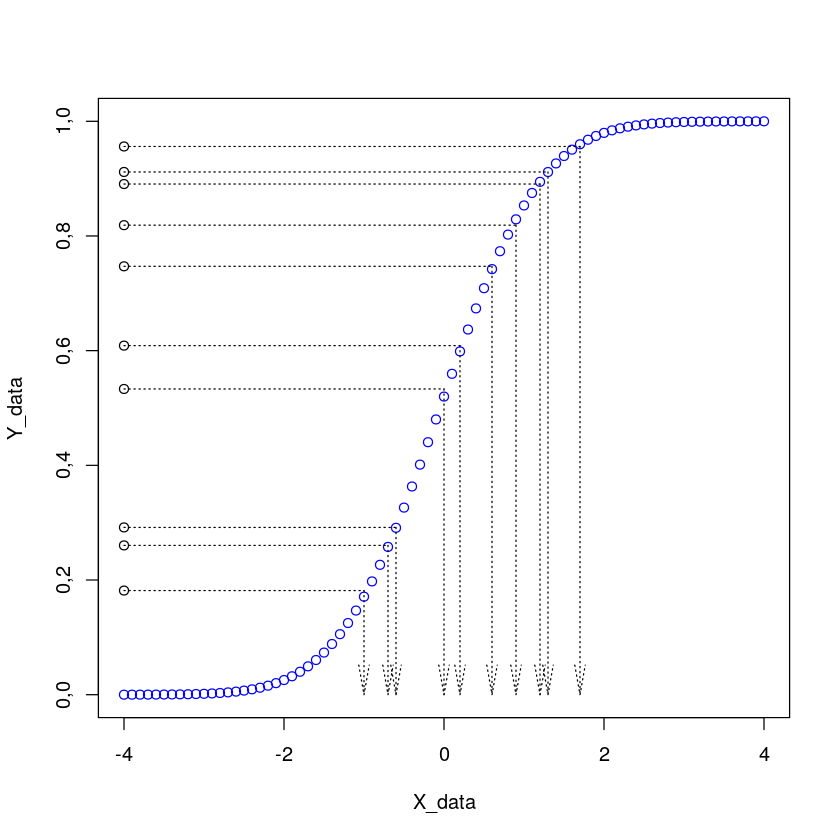

In [85]:
plot(norm_acum_data, col='blue')
random_points <- runif(10)
points(rep(-4,10), random_points)

for(i in c(1:10)){
    idx <- which.min(abs(random_points[i]-norm_acum_data[,2]))
    nearest <- norm_acum_data[idx,1]
    segments(x0=-4, y0=random_points[i],
             x1=nearest, y1=random_points[i], lty=3)
    #vertical
    arrows(x0=nearest, y0=random_points[i],
             x1=nearest, y1=0, angle=10, lty=3)
}

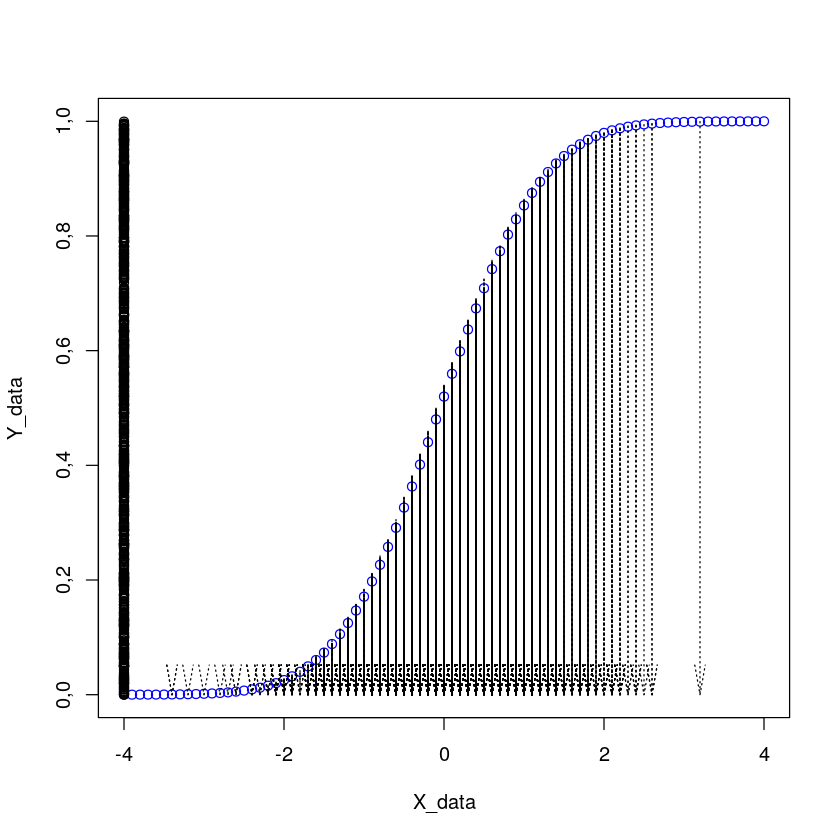

In [89]:
plot(norm_acum_data, col='blue')
random_points <- runif(1000)
genera_points <- rep(0,1000)
points(rep(-4,1000), random_points)

for(i in c(1:1000)){
    idx <- which.min(abs(random_points[i]-norm_acum_data[,2]))
    nearest <- norm_acum_data[idx,1]
    #segments(x0=-4, y0=random_points[i],
    #         x1=nearest, y1=random_points[i])
    #vertical
    arrows(x0=nearest, y0=random_points[i]+1e-9,
           x1=nearest, y1=0, angle=10, lty=3)
    genera_points[i] <- nearest
}


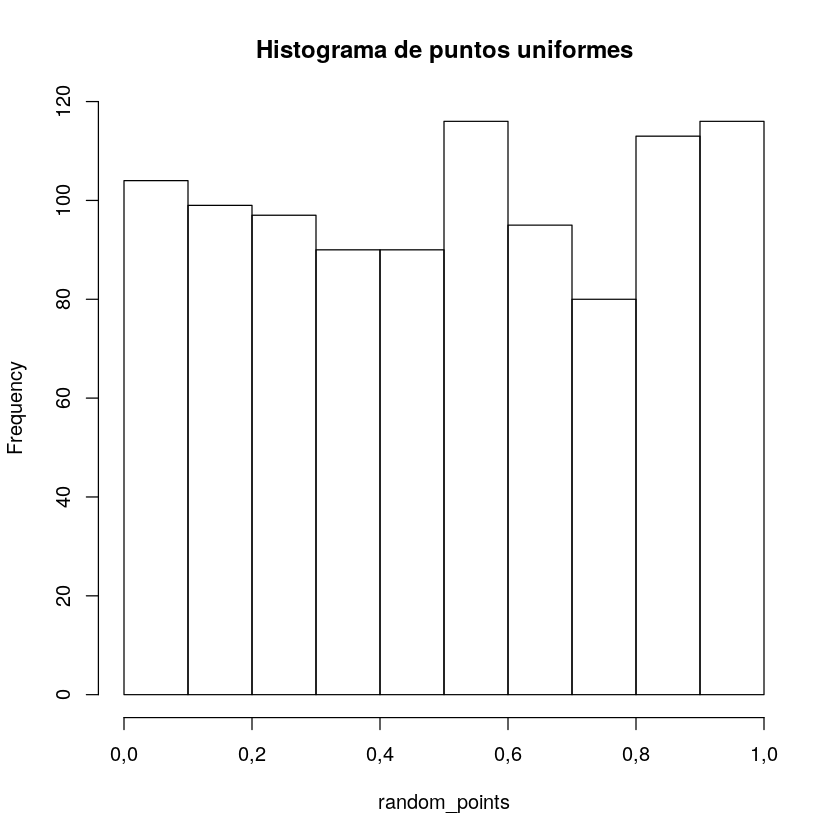

In [90]:
hist(random_points, main=NULL)
title('Histograma de puntos uniformes')

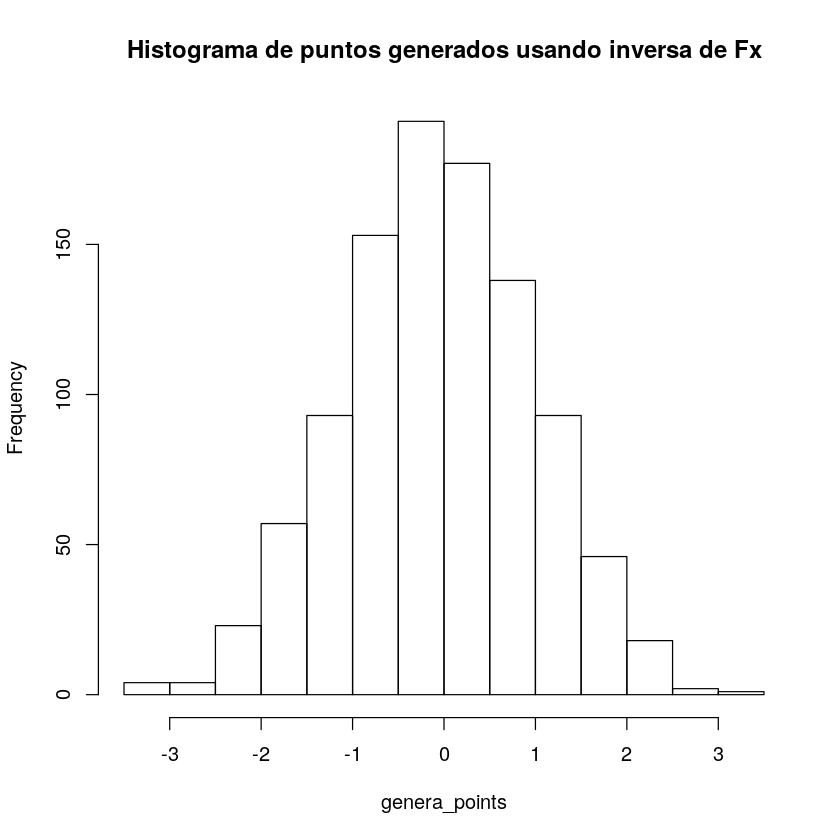

In [91]:
hist(genera_points, main=NULL)
title('Histograma de puntos generados usando inversa de Fx')

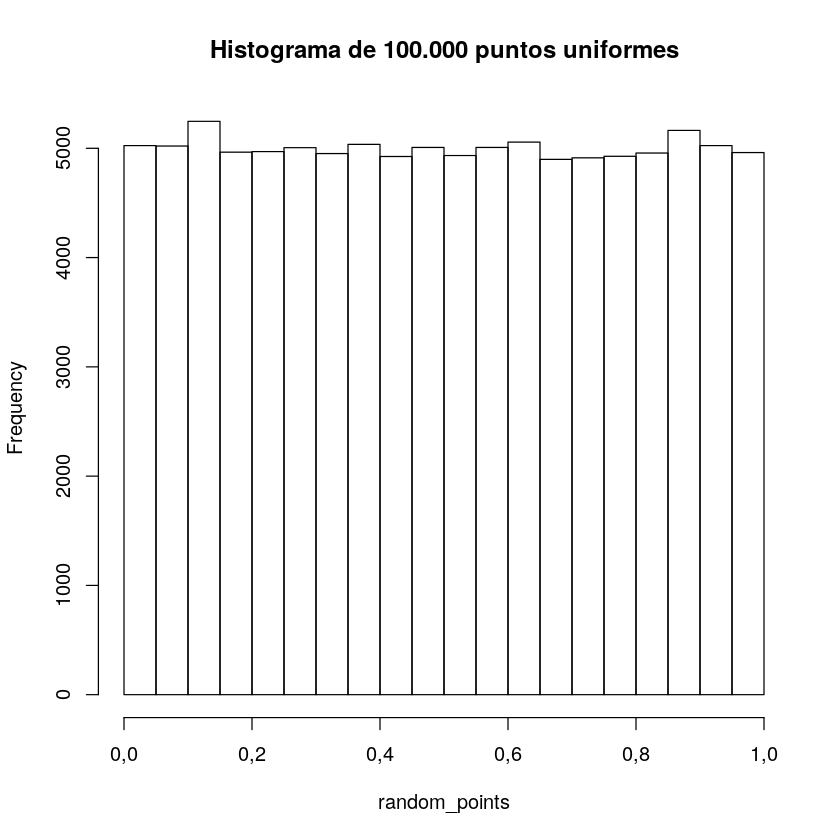

In [92]:
#plot(norm_acum_data, col='blue')
random_points <- runif(100000)
genera_points <- rep(0,100000)
#points(rep(-4,100000), random_points)

for(i in c(1:100000)){
    idx <- which.min(abs(random_points[i]-norm_acum_data[,2]))
    nearest <- norm_acum_data[idx,1]
    #segments(x0=-4, y0=random_points[i],
    #         x1=nearest, y1=random_points[i])
    #vertical
    #arrows(x0=nearest, y0=random_points[i],
    #       x1=nearest, y1=0, angle=10)
    genera_points[i] <- nearest
}
hist(random_points, main=NULL)
title('Histograma de 100.000 puntos uniformes')

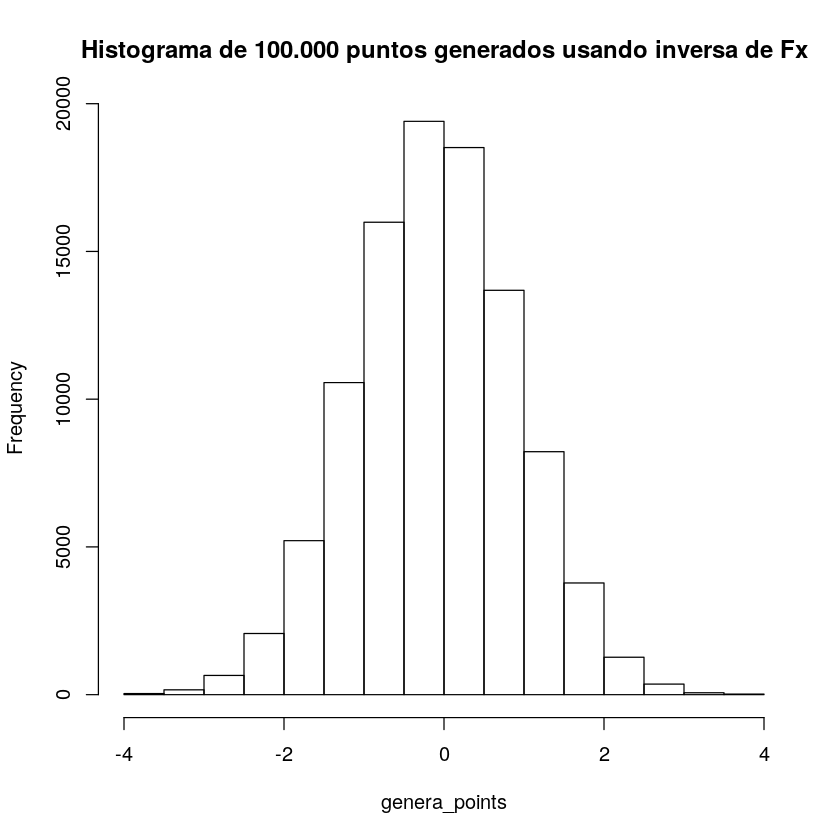

In [93]:
hist(genera_points, main=NULL)
title('Histograma de 100.000 puntos generados usando inversa de Fx')

# Ajuste fino

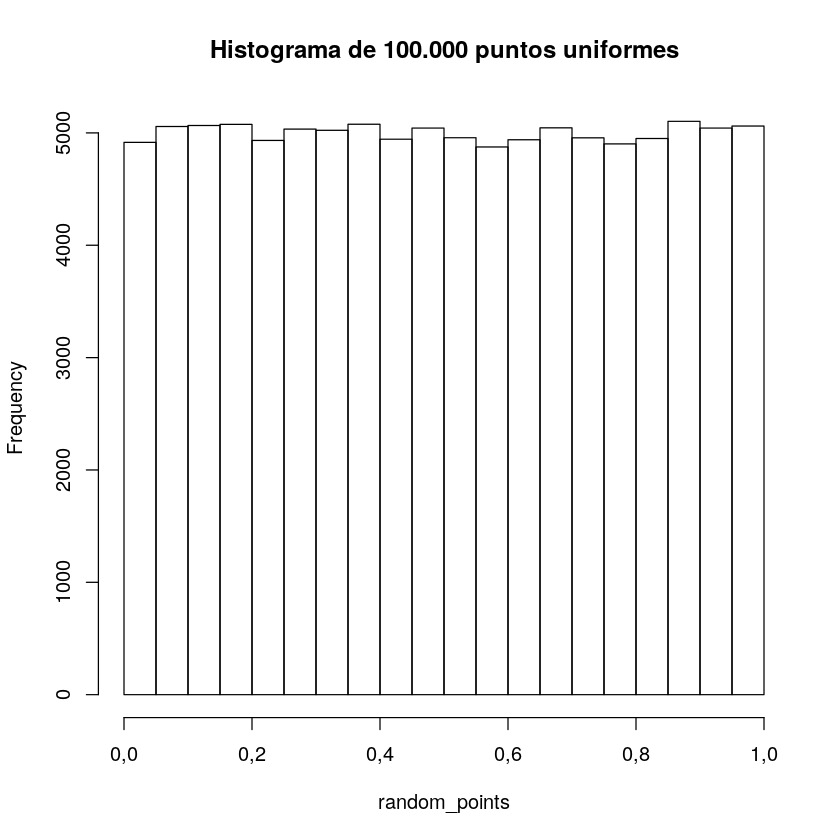

In [110]:
#plot(norm_acum_data, col='blue')
random_points <- runif(100000)
genera_points <- qnorm(random_points)
hist(random_points, main=NULL)
title('Histograma de 100.000 puntos uniformes')

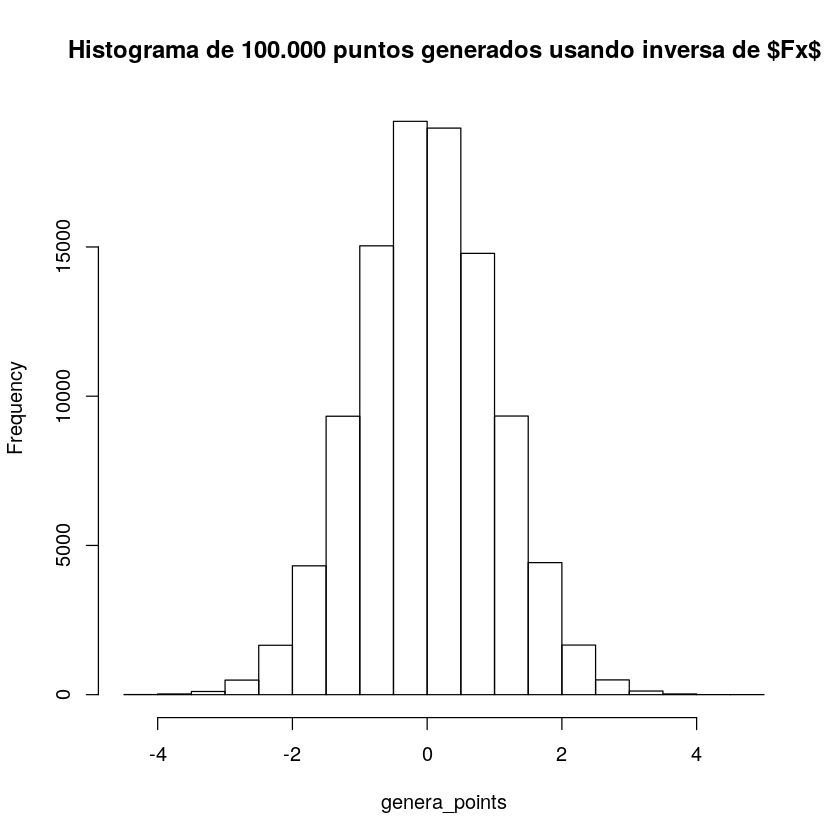

In [112]:
hist(genera_points, main=NULL)
title('Histograma de 100.000 puntos generados usando inversa de $Fx$')

# Normal para cualquier *mu, sigma*

Partiendo de una Normal $N(0,1)$ podemos modificar su **media** $\mu$ y **varianza** $\sigma^2$:

Sea $X$ variable aleatoria Normal con media 0 y varianza 1:

$$X \sim N(0,1)$$

Puedo modificar su media sumando una constante $c \in R$:

$$X + c \sim c + N(0,1)$$

$$X + c \sim N(c,1)$$


### En datos

In [116]:
X_data <- seq(-4, 4, 0.1)
Y_data <- dnorm(X_data, mean=0, sd=1) 
data   <- data.frame(X_data, Y_data)
head(data)

X_data,Y_data
"-4,0","0,0001338302"
"-3,9","0,0001986555"
"-3,8","0,0002919469"
"-3,7","0,0004247803"
"-3,6","0,0006119019"
"-3,5","0,0008726827"


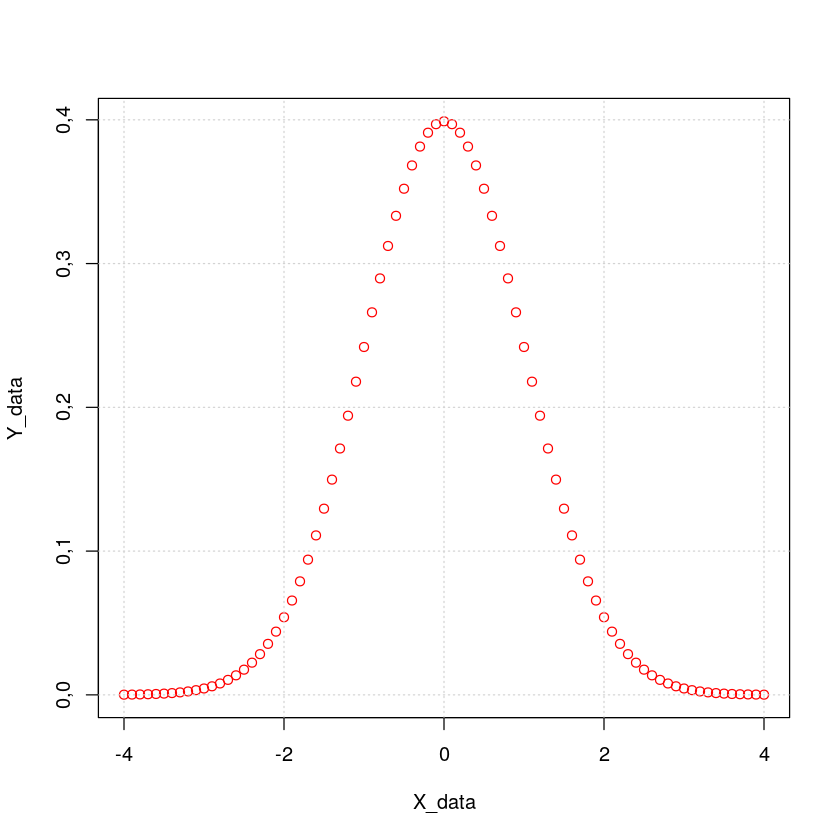

In [115]:
plot(data, col='red')
grid()

### Moviendo la Media

Si mantengo los valores de la densidad en el eje Y, pero sumo una constante a los valores de X, "muevo" la media de la distribución.

$X \sim N(0,1)$

Como $\mu = E[X]$, por propiedad de la esperanza:

$X + c \sim N(c,1)$

In [125]:
X_data2 <- X_data + 2
Y_data2 <- dnorm(X_data, mean=0, sd=1) 
data2   <- data.frame(X_data2, Y_data2)
head(data2)

X_data2,Y_data2
"-2,0","0,0001338302"
"-1,9","0,0001986555"
"-1,8","0,0002919469"
"-1,7","0,0004247803"
"-1,6","0,0006119019"
"-1,5","0,0008726827"


In [129]:
X_data37 <- X_data - 37
Y_data37 <- dnorm(X_data, mean=0, sd=1) 
data37   <- data.frame(X_data37, Y_data37)
head(data37)

X_data37,Y_data37
"-41,0","0,0001338302"
"-40,9","0,0001986555"
"-40,8","0,0002919469"
"-40,7","0,0004247803"
"-40,6","0,0006119019"
"-40,5","0,0008726827"


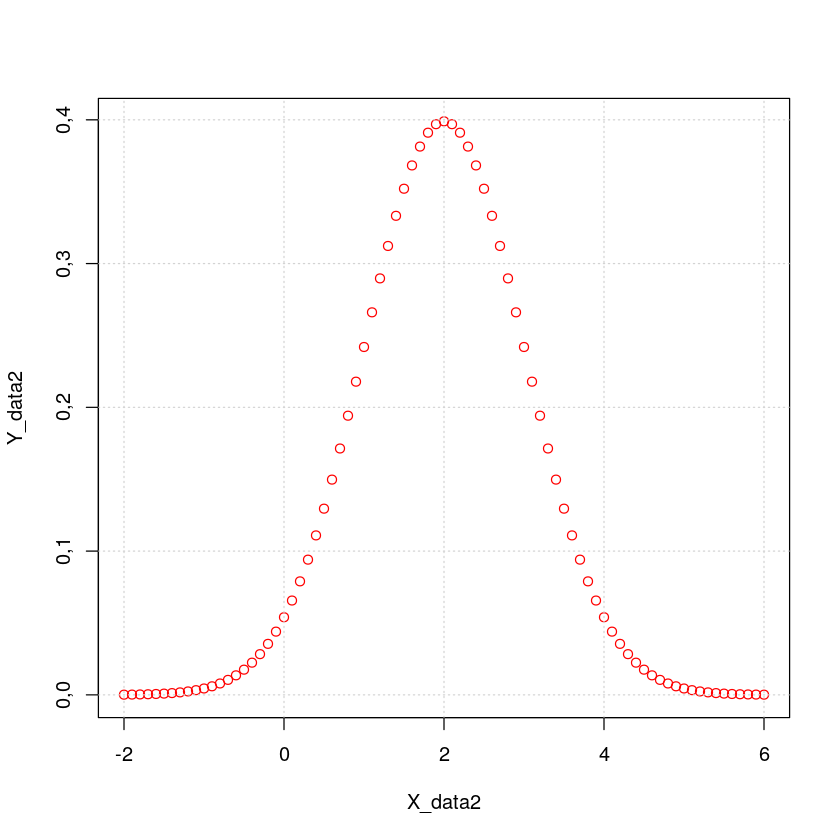

In [130]:
plot(data2, col='red')
grid()

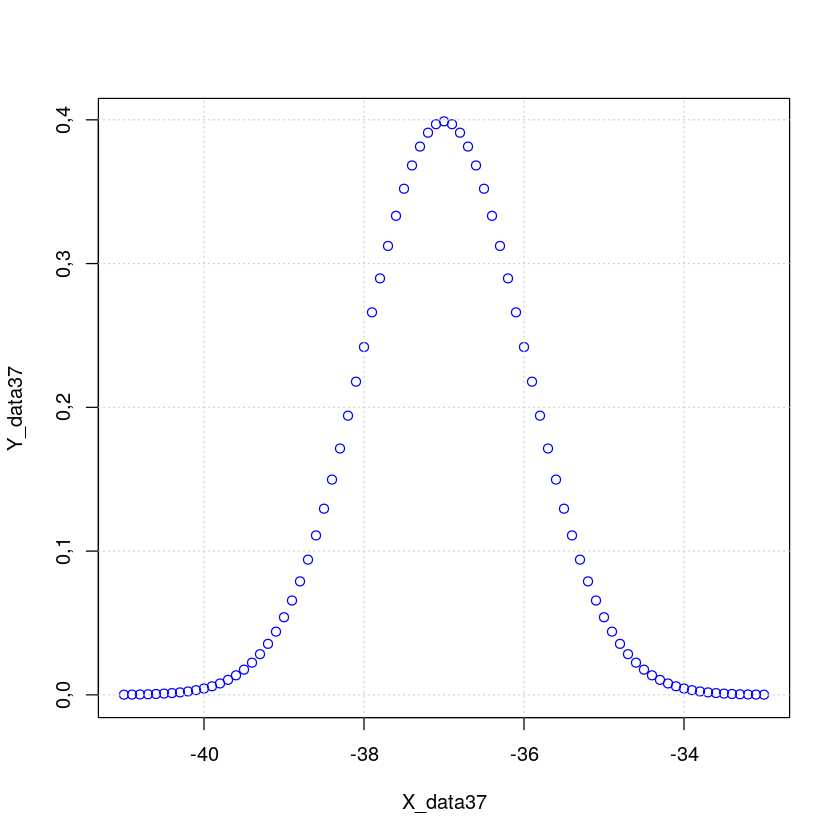

In [132]:
plot(data37, col='blue')
grid()

### Variando la Varianza

Si **multiplico** por una constante a los valores de X, aumentará/disminuirá la varianza de la distribución.

Debo renormalizar los valores de Y para que su área siga siendo 1.

$X \sim N(0,1)$

Como $\sigma^2 = E[X^2] - E^2[X]$, por propiedad de la esperanza:

$X * c \sim N(0,c^2)$

In [142]:
X_data2 <- X_data * sqrt(4)
Y_data2 <- 1/4 * dnorm(X_data, mean=0, sd=1) 
data2   <- data.frame(X_data2, Y_data2)
head(data2)

X_data2,Y_data2
"-8,0","3,345756e-05"
"-7,8","4,966387e-05"
"-7,6","7,298673e-05"
"-7,4","1,061951e-04"
"-7,2","1,529755e-04"
"-7,0","2,181707e-04"


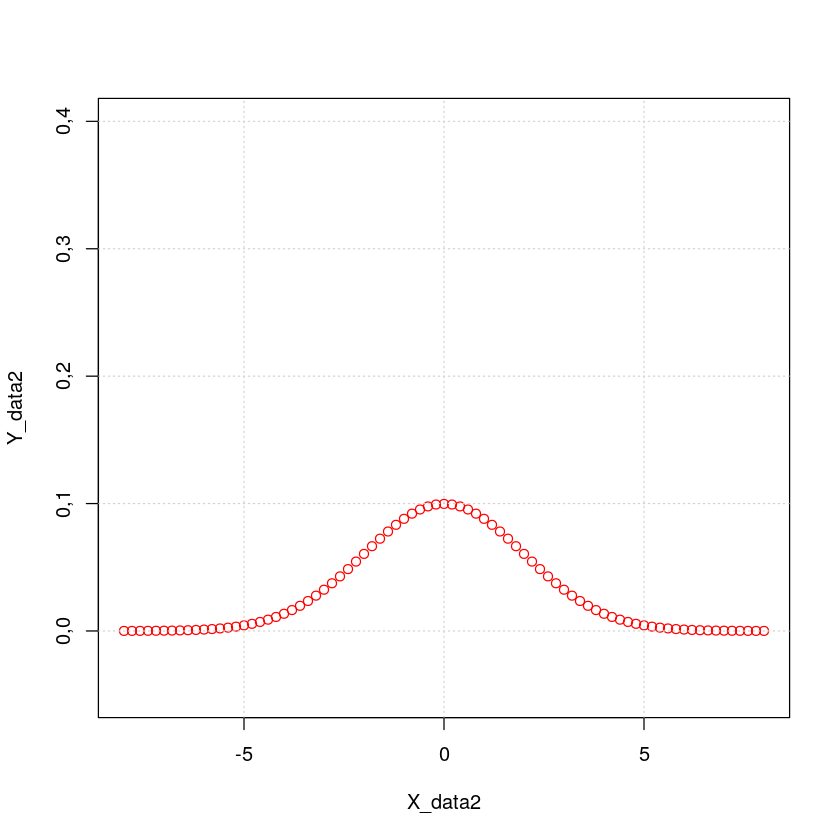

In [159]:
plot(data2, col='red', ylim=c(-0.05,0.4))
grid()

In [158]:
X_data3 <- X_data * 0.01
Y_data3 <- 1/0.01 * dnorm(X_data, mean=0, sd=1) 
data3   <- data.frame(X_data3, Y_data3)
head(data3)

X_data3,Y_data3
"-0,040","0,01338302"
"-0,039","0,01986555"
"-0,038","0,02919469"
"-0,037","0,04247803"
"-0,036","0,06119019"
"-0,035","0,08726827"


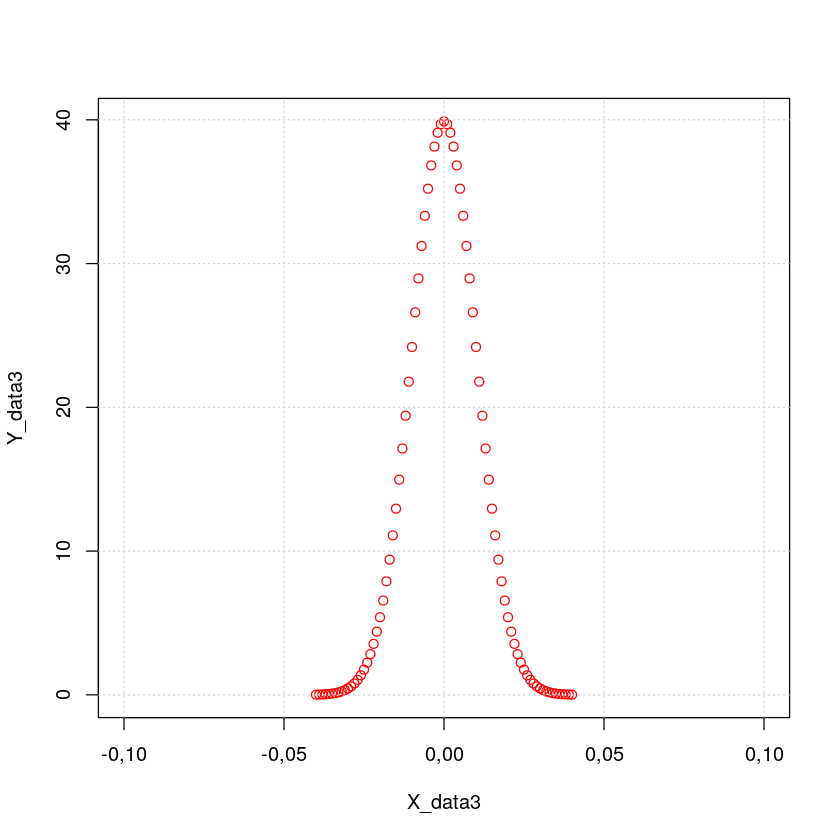

In [160]:
plot(data3, col='red', xlim=c(-0.1,0.1))
grid()

# Usando Normal generada

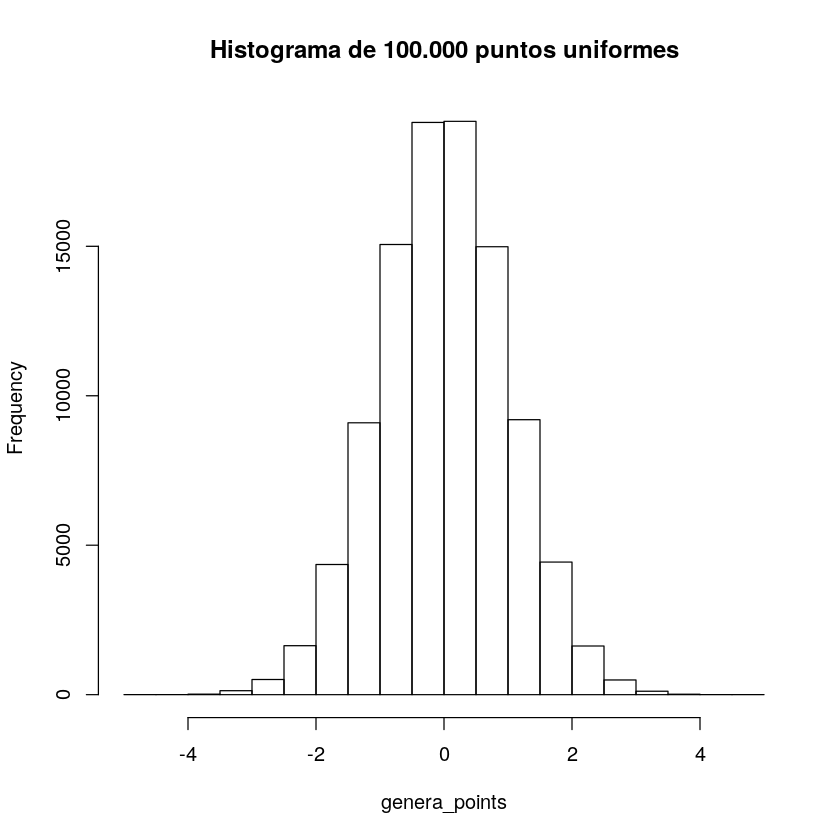

In [2]:
#plot(norm_acum_data, col='blue')
random_points <- runif(100000)
genera_points <- qnorm(random_points)
hist(genera_points, main=NULL)
title('Histograma de 100.000 puntos uniformes')

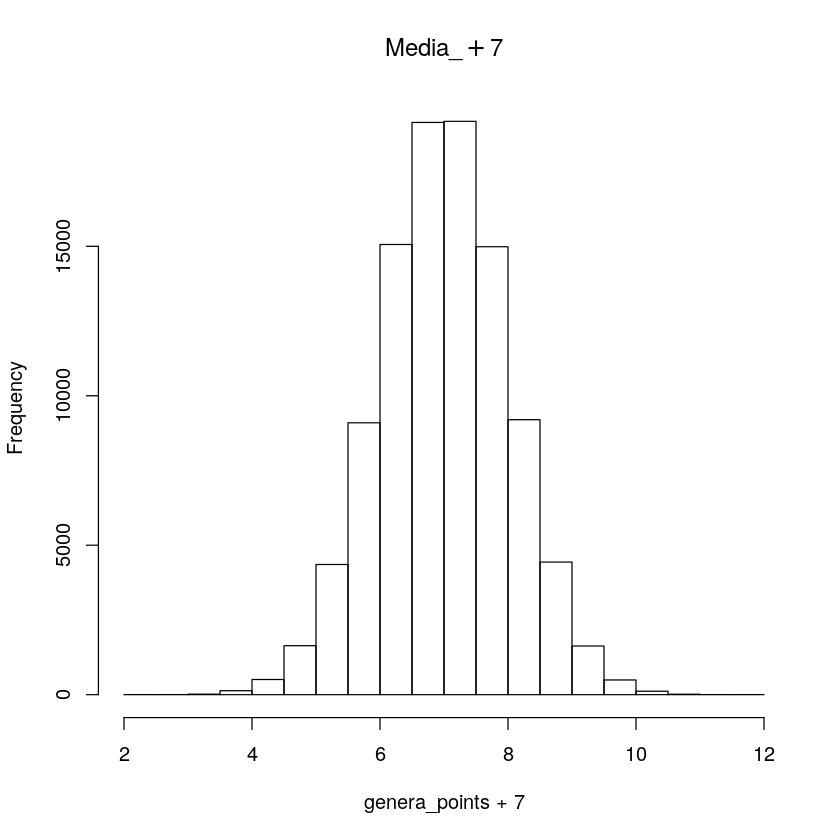

In [62]:
hist(genera_points+7, main=expression(Media_+7))

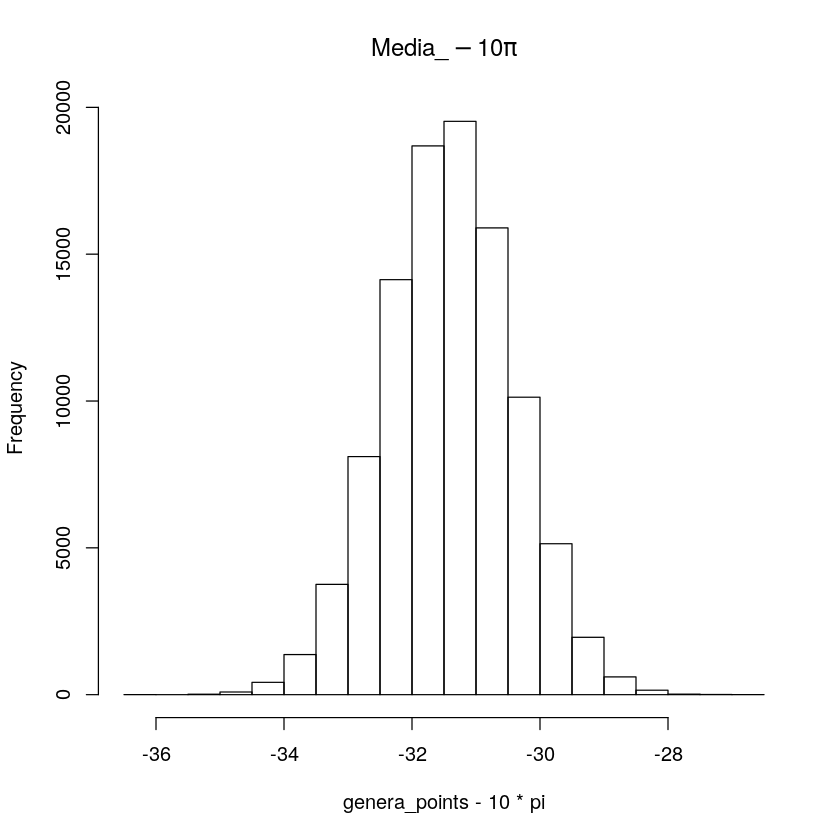

In [61]:
hist(genera_points-10*pi, main=expression(Media_-10*pi))

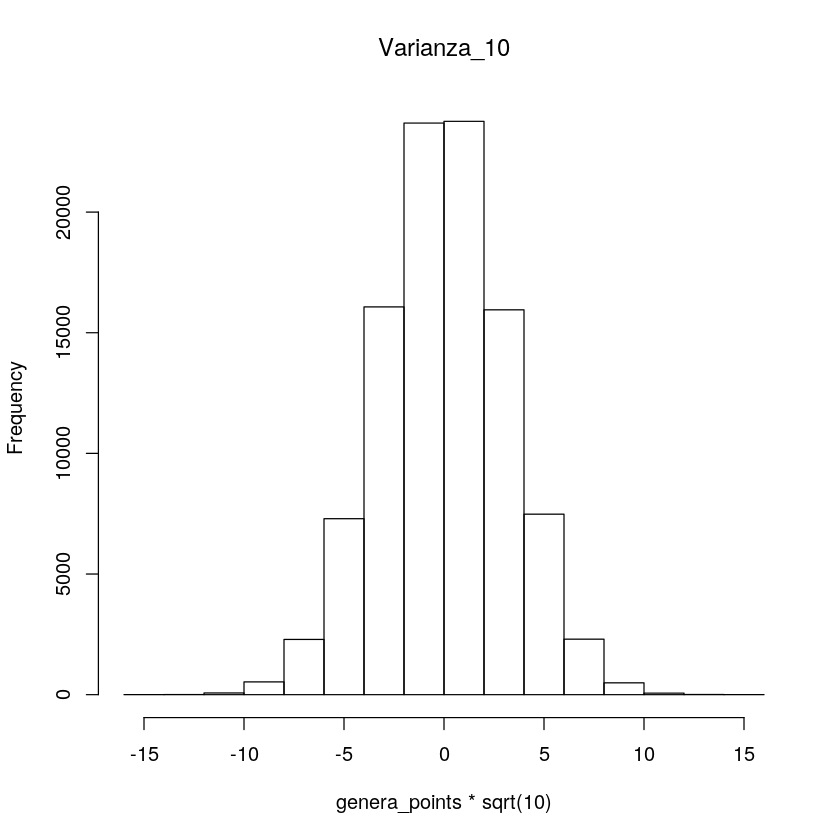

In [59]:
hist(genera_points*sqrt(10), main=expression(Varianza_10))

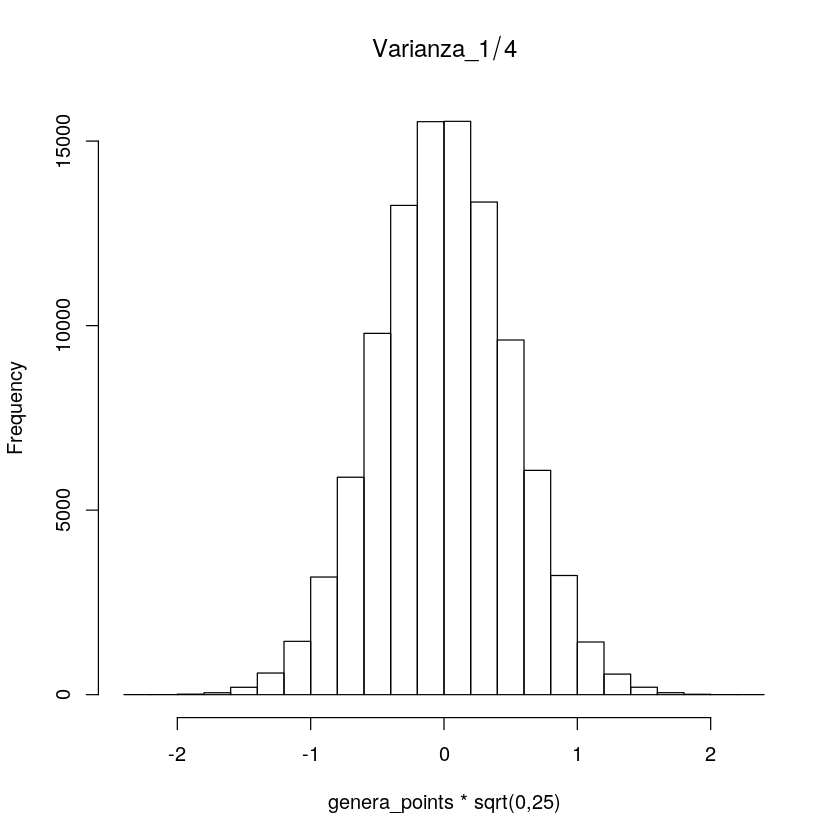

In [60]:
hist(genera_points*sqrt(0.25), main=expression(Varianza_1/4))